Import Libraries

Load necessary Python libraries for data manipulation, visualization, and scaling.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
from datetime import datetime

1. Data Loading

Read the CSV files into pandas DataFrames.

In [26]:
# Load datasets

social_url = r"C:\Users\HP\Desktop\formative-two\product_recommendation_system\data\datasets\customer_social_profiles - customer_social_profiles.csv"
transactions_url = r"C:\Users\HP\Desktop\formative-two\product_recommendation_system\data\datasets\customer_transactions - customer_transactions.csv"

df_social = pd.read_csv(social_url)

df_social = pd.read_csv(social_url)
df_transactions  = pd.read_csv(transactions_url)


# Display 
print("Customer Social Profiles Shape:", df_social.shape)
print("Columns:", df_social.columns.tolist())
df_social.info()
print("\nCustomer Transactions Shape:", df_transactions.shape)
print("Columns:", df_transactions.columns.tolist())
df_transactions.info()

display(df_social.head())
display(df_transactions.head())


Customer Social Profiles Shape: (155, 5)
Columns: ['customer_id_new', 'social_media_platform', 'engagement_score', 'purchase_interest_score', 'review_sentiment']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id_new          155 non-null    object 
 1   social_media_platform    155 non-null    object 
 2   engagement_score         155 non-null    int64  
 3   purchase_interest_score  155 non-null    float64
 4   review_sentiment         155 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 6.2+ KB

Customer Transactions Shape: (150, 6)
Columns: ['customer_id_legacy', 'transaction_id', 'purchase_amount', 'purchase_date', 'product_category', 'customer_rating']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column              N

,customer_id_new,social_media_platform,engagement_score,purchase_interest_score,review_sentiment
0,A178,LinkedIn,74,4.9,Positive
1,A190,Twitter,82,4.8,Neutral
2,A150,Facebook,96,1.6,Positive
3,A162,Twitter,89,2.6,Positive
4,A197,Twitter,92,2.3,Neutral


,customer_id_legacy,transaction_id,purchase_amount,purchase_date,product_category,customer_rating
0,151,1001,408,2024-01-01,Sports,2.3
1,192,1002,332,2024-01-02,Electronics,4.2
2,114,1003,442,2024-01-03,Electronics,2.1
3,171,1004,256,2024-01-04,Clothing,2.8
4,160,1005,64,2024-01-05,Clothing,1.3


2. Data Merging

Combine datasets using an inner merge to retain only matching records.

In [27]:
df_social['customer_id'] = df_social['customer_id_new'].str[1:].astype(int)
df_transactions.rename(columns={'customer_id_legacy': 'customer_id'}, inplace=True)
merged_df = pd.merge(df_social, df_transactions, on='customer_id', how='inner')

print("Merged Data Shape:", merged_df.shape)
print(merged_df.head())
print("Unique customers in merged:", merged_df['customer_id'].nunique())

Merged Data Shape: (219, 11)
  customer_id_new social_media_platform  engagement_score  \
0            A190               Twitter                82   
1            A190               Twitter                82   
2            A150              Facebook                96   
3            A150              Facebook                96   
4            A162               Twitter                89   

   purchase_interest_score review_sentiment  customer_id  transaction_id  \
0                      4.8          Neutral          190            1031   
1                      4.8          Neutral          190            1140   
2                      1.6         Positive          150            1042   
3                      1.6         Positive          150            1046   
4                      2.6         Positive          162            1079   

   purchase_amount purchase_date product_category  customer_rating  
0              333    2024-01-31        Groceries              3.8  
1        

3. Data Cleaning

Handle missing values, duplicates, data types, and standardization.

In [28]:

# Handle missing values
print("Missing Values Before Cleaning:")
print(merged_df.isnull().sum())

# Impute missing customer_rating with mean
if 'customer_rating' in merged_df.columns:
    mean_rating = merged_df['customer_rating'].mean()
    merged_df['customer_rating'] = merged_df['customer_rating'].fillna(mean_rating)

# Convert purchase_date to datetime
merged_df['purchase_date'] = pd.to_datetime(merged_df['purchase_date'], errors='coerce')

# Check and remove duplicates
duplicates = merged_df.duplicated().sum()
print(f"Number of duplicates: {duplicates}")
merged_df = merged_df.drop_duplicates().reset_index(drop=True)

# Standardize categorical values to Title Case
categorical_cols = ['social_media_platform', 'product_category', 'review_sentiment']
for col in categorical_cols:
    if col in merged_df.columns:
        merged_df[col] = merged_df[col].str.title()

# Data types verification
print("\nData Types After Cleaning:")
print(merged_df.dtypes)

print("Missing Values After Cleaning:")
print(merged_df.isnull().sum())

Missing Values Before Cleaning:
customer_id_new             0
social_media_platform       0
engagement_score            0
purchase_interest_score     0
review_sentiment            0
customer_id                 0
transaction_id              0
purchase_amount             0
purchase_date               0
product_category            0
customer_rating            19
dtype: int64
Number of duplicates: 6

Data Types After Cleaning:
customer_id_new                    object
social_media_platform              object
engagement_score                    int64
purchase_interest_score           float64
review_sentiment                   object
customer_id                         int64
transaction_id                      int64
purchase_amount                     int64
purchase_date              datetime64[ns]
product_category                   object
customer_rating                   float64
dtype: object
Missing Values After Cleaning:
customer_id_new            0
social_media_platform      0
engageme

4. Exploratory Data Analysis (EDA)

Analyze data structure, statistics, and relationships (summarises statistics and visualizations to understand the data)

Numerical Summary:
       engagement_score  purchase_interest_score  customer_id  transaction_id  \
count        213.000000               213.000000   213.000000      213.000000   
mean          75.596244                 3.093427   147.676056     1075.835681   
min           50.000000                 1.000000   100.000000     1001.000000   
25%           63.000000                 2.100000   117.000000     1040.000000   
50%           77.000000                 3.200000   147.000000     1074.000000   
75%           89.000000                 4.100000   181.000000     1115.000000   
max           99.000000                 5.000000   199.000000     1150.000000   
std           15.149145                 1.160211    32.325632       45.104138   

       purchase_amount                  purchase_date  customer_rating  
count       213.000000                            213       213.000000  
mean        289.807512  2024-03-15 20:03:22.816901376         3.077857  
min          62.000000          

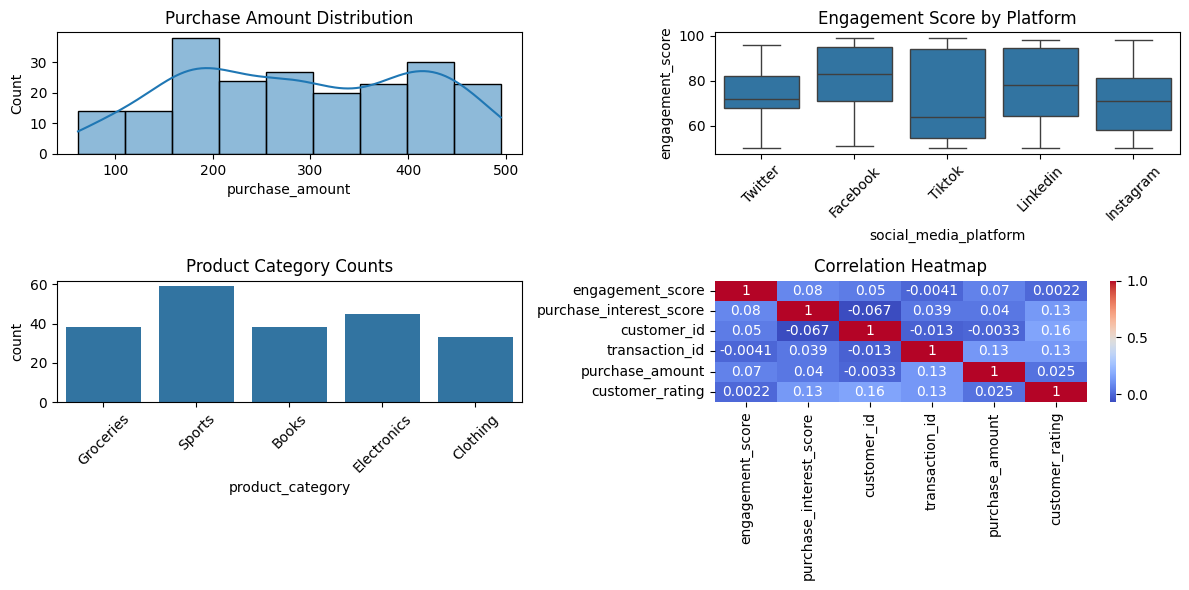

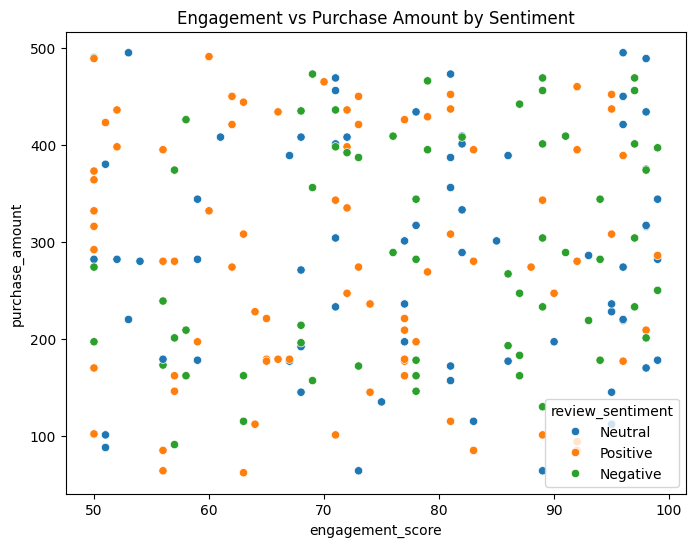

In [29]:

# Summary statistics
print("Numerical Summary:")
print(merged_df.describe())

print("\nCategorical Summary:")
print(merged_df['social_media_platform'].value_counts())
print(merged_df['product_category'].value_counts())
print(merged_df['review_sentiment'].value_counts())

# Visualizations
plt.figure(figsize=(12, 6))

# Histogram for purchase_amount
plt.subplot(2, 2, 1)
sns.histplot(merged_df['purchase_amount'], kde=True)
plt.title('Purchase Amount Distribution')

# Boxplot for engagement_score by platform
plt.subplot(2, 2, 2)
sns.boxplot(x='social_media_platform', y='engagement_score', data=merged_df)
plt.title('Engagement Score by Platform')
plt.xticks(rotation=45)

# Bar chart for product_category counts
plt.subplot(2, 2, 3)
sns.countplot(x='product_category', data=merged_df)
plt.title('Product Category Counts')
plt.xticks(rotation=45)

# Correlation heatmap (select numerical columns)
numerical_cols = merged_df.select_dtypes(include=['float64', 'int64']).columns
corr = merged_df[numerical_cols].corr()
plt.subplot(2, 2, 4)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

plt.tight_layout()
plt.show()

# Scatterplot: engagement_score vs purchase_amount
plt.figure(figsize=(8, 6))
sns.scatterplot(x='engagement_score', y='purchase_amount', hue='review_sentiment', data=merged_df)
plt.title('Engagement vs Purchase Amount by Sentiment')
plt.show()

5. Output

In [30]:
# Save clean merged dataset
merged_df.to_csv(r'C:\Users\HP\Desktop\formative-two\product_recommendation_system\data\processed\merged_dataset.csv', index=False)
print("Clean merged dataset saved as 'merged_dataset.csv'")

Clean merged dataset saved as 'merged_dataset.csv'
